In [4]:
from basic_import import *
from scipy.signal import find_peaks

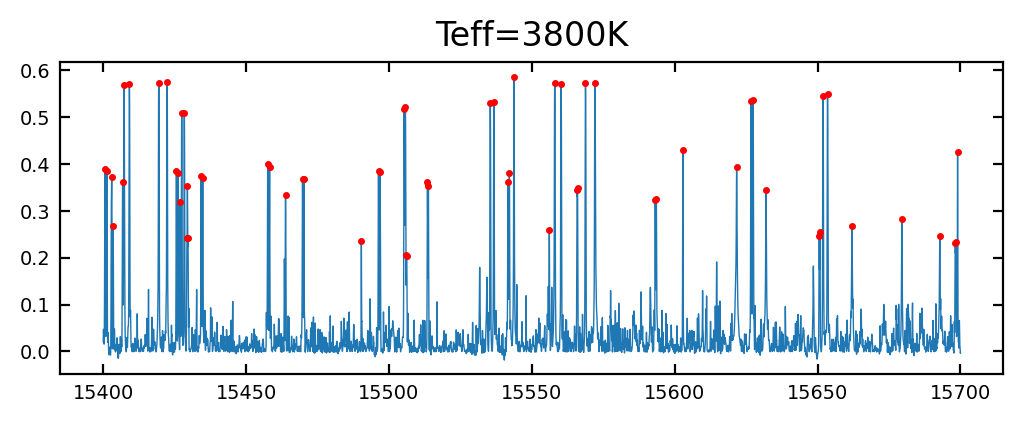

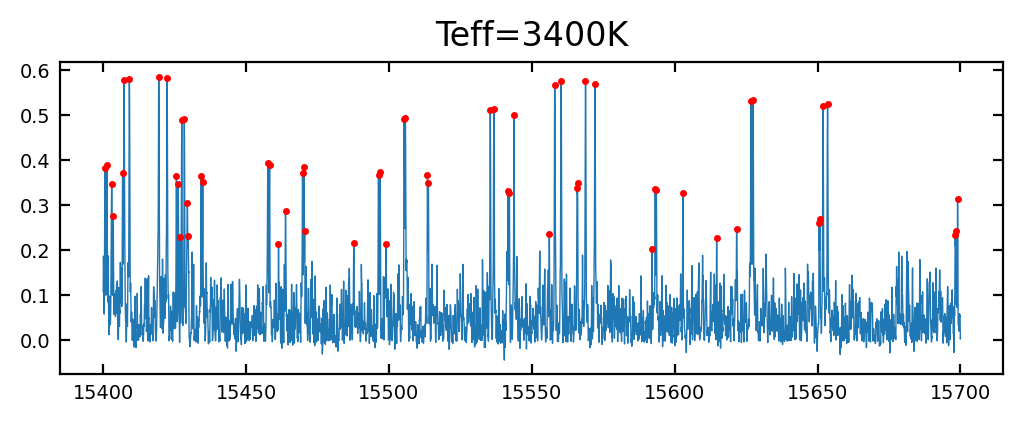

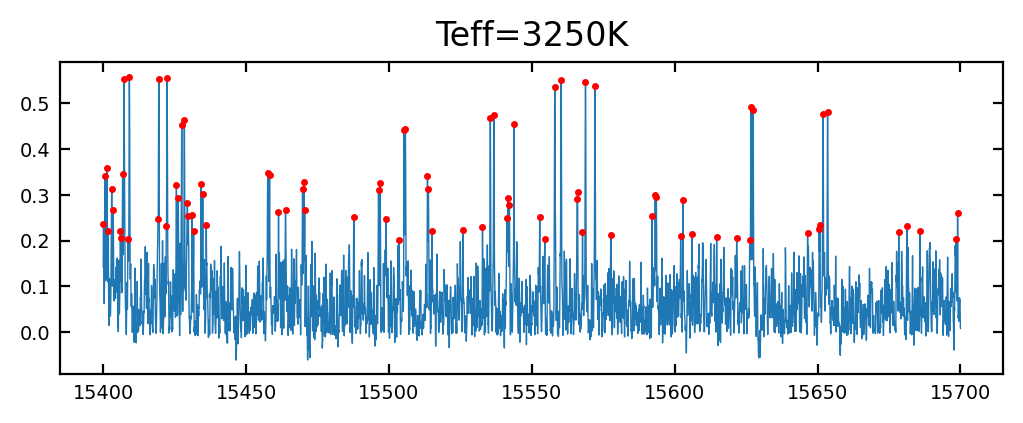

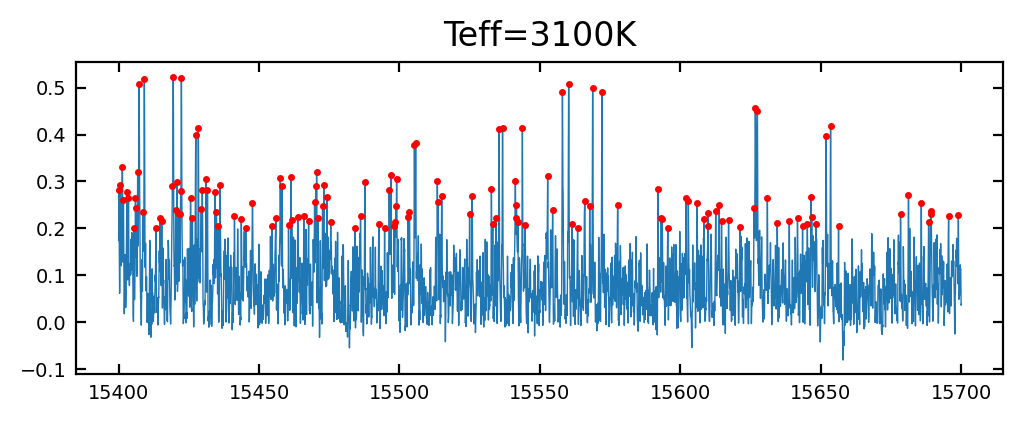

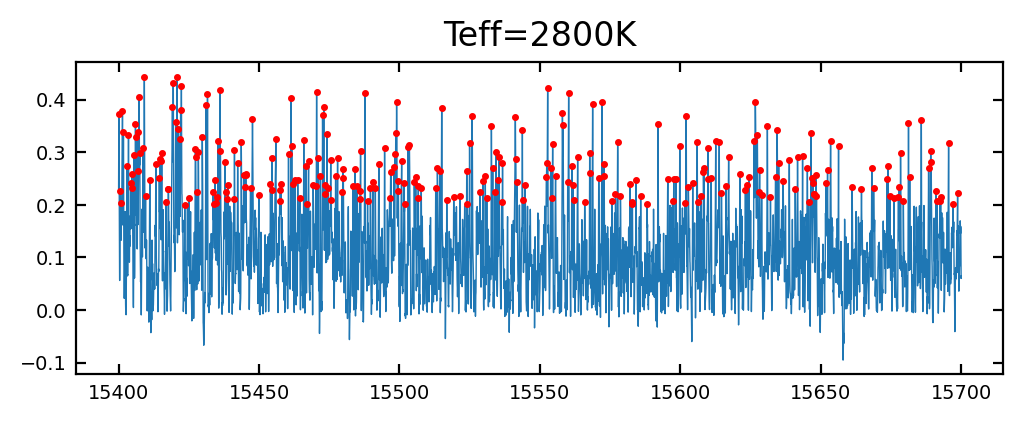

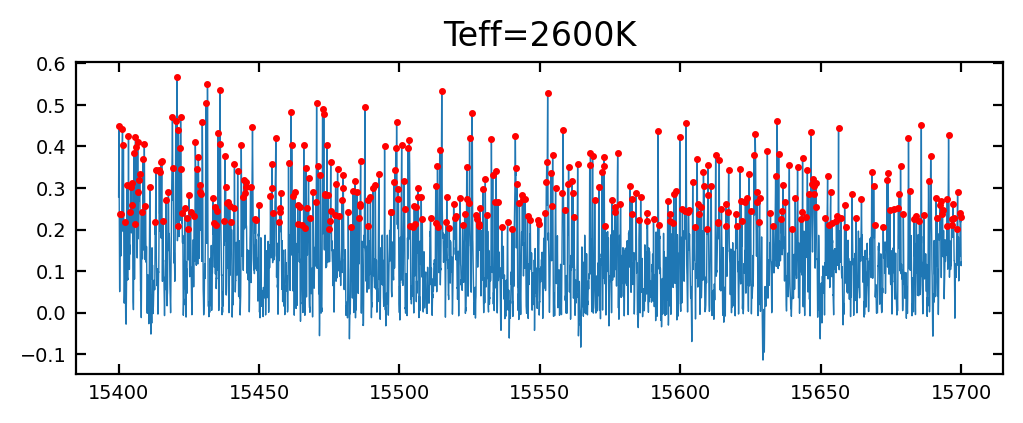

In [14]:
for tt, mm in zip(
    [3800, 3400, 3250, 3100, 2800, 2600], 
    ['M0', 'M2', 'M3', 'M4', 'M5', 'M6']):
    spec_name = f'../SOAP_code/input_phoenix/RASSINE_New_Phoenix_{tt}.p'
    seed_frame = pd.read_pickle(spec_name)

    spec_org = seed_frame['flux']
    spec_normed = seed_frame['flux']/seed_frame['output']['continuum_cubic']
    spec_contin = seed_frame['output']['continuum_cubic']
    spec_wave = seed_frame['wave']

    invert_flux = 1-spec_normed
    peaks, _ = find_peaks(
        invert_flux, height=0.2)

    #------------
    fig, ax = plt.subplots(1, 1, figsize=(5, 2), dpi=200)


    ax.plot(spec_wave, invert_flux, label='noconti')
    ax.plot(spec_wave[peaks], invert_flux[peaks], 'r.', ms=3)

    ax.set_title(f'Teff={tt}K')

    out_tab = Table(data=(spec_wave[peaks], invert_flux[peaks]), names=('wave', 'flux'))
    out_tab['wave'].format = '1.10e'
    out_tab['flux'].format = '1.10e'
    out_tab.write(f'../SOAP_code/input_mask/{mm}_mask.txt', overwrite=True, format='ascii.no_header')   
    # ax.plot(mark_wave, mark_flux, 'r.')

    # ax.set_xlim(1e6, 3e6)